In [7]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
root = '/Volumes/EDDropbox/Data/'
os.chdir(root)
data_dir = os.path.join(root,'scfmh2/')
figure_dir = os.path.join(root,'scfmh2/figures/')

In [3]:
filelist = glob.glob(data_dir+'*.bin')
filelist.sort(key=lambda f: f[len(data_dir):-4].lower())
for f in filelist:
    print '\'{0}\''.format(f[len(data_dir):])

'gateswp_17-16-6_300mK_a.bin'
'gateswp_17-16-6_4K-0T_a.bin'
'gateswp_17-16-6_4K-0T_b.bin'
'gateswp_17-16-6_4K-0T_c.bin'
'gateswp_17-16-6_4K-0T_d.bin'
'gateswp_17-16-6_4K-0T_e.bin'
'gateswp_17-16-6_4K-0T_f.bin'
'gateswp_17-16-6_4K-0T_g.bin'
'gateswp_17-16-6_4K-0T_h.bin'
'gateswp_17-16-6_4K-0T_i.bin'
'gateswp_17-16-6_4K-3T_a.bin'
'gateswp_17-16-6_4K-3T_b.bin'
'gateswp_17-16-6_4K-6T_a.bin'
'gateswp_17-16-6_4K-6T_b.bin'
'gateswp_17-16-6_4K_a.bin'
'gateswp_17-16-6_4K_b.bin'
'gateswp_17-16-6_4K_long.bin'
'gateswp_17-16-6_4K_long_a.bin'
'gateswp_17-16-6_4K_long_b.bin'
'gateswp_17-16-6_4K_tempoff.bin'
'gateswp_17-16-6_4K_tempoff_fast.bin'
'gateswp_20-17-6_4K-0T_a.bin'
'gateswp_20-17-6_4K-0T_b.bin'
'RT_16-17_6_4to0p25_a.bin'
'RT_17-16-6_4to10K_a.bin'
'stability_15-26-6_4K_0T_a.bin'
'stability_17-16-6_2182in_4K_a.bin'
'stability_17-16-6_2182in_4K_b.bin'
'stability_17-16-6_2182in_4K_c.bin'
'stability_17-16-6_4K_a.bin'
'stability_17-16-6_4K_b.bin'
'stability_17-16-6_4K_c.bin'
'stability_17-16-6_4K

# 17-16 Permalloy/Niobium

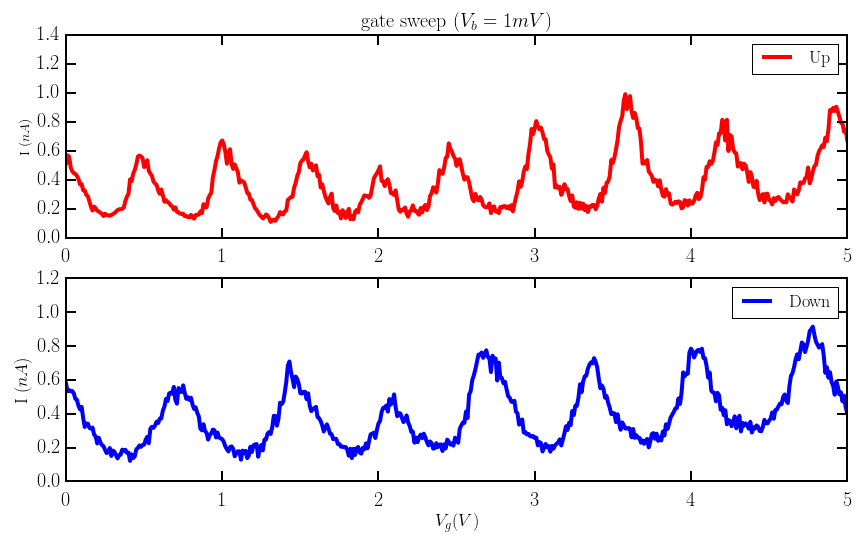

In [6]:
f = data_dir+'gateswp_17-16-6_300mK_a.bin'

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', label = 'Up')
ax1.set_xlim(0,5)
ax1.set_title('gate sweep ($V_b = 1mV$)')
ax1.set_ylabel('I $(nA)$', fontsize=14)
ax1.legend(fontsize = 18)

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', label = 'Down')
ax2.set_xlim(0,5)
ax2.set_xlabel('$V_g (V)$')
ax2.set_ylabel('I $(nA)$')
ax2.legend(fontsize = 18)
#fig.savefig(figure_dir+'17-16_gatesweep_a'+'.png', dpi=200)

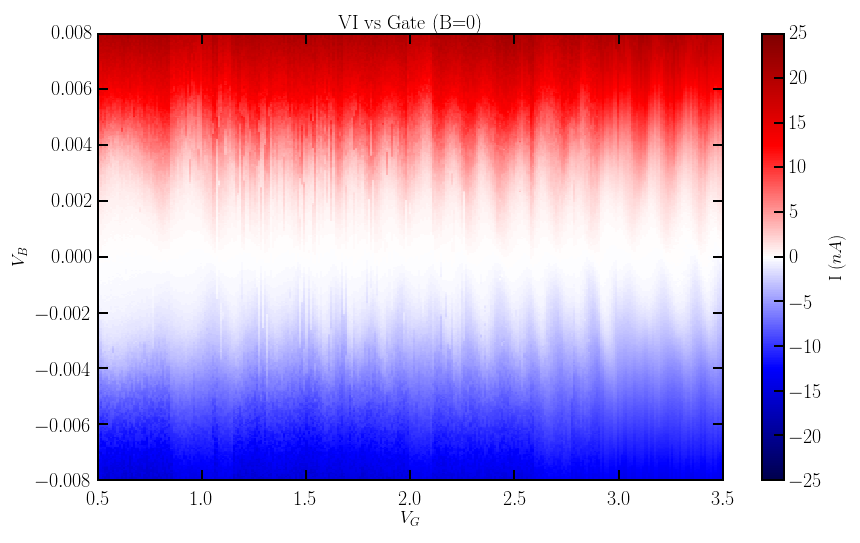

In [9]:
f = data_dir+'vigate_17-16-6_300mK_b.bin'

vigate = lvdt.get_data_3d(f)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic, vmin = -25, vmax = 25,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('VI vs Gate (B=0)')
ax.set_xlabel('$V_G$')
ax.set_ylabel('$V_B$')
cb = plt.colorbar(im)
cb.set_label('I $(nA)$')

What the hell? Why did the sizes change here? Checking the gate again...

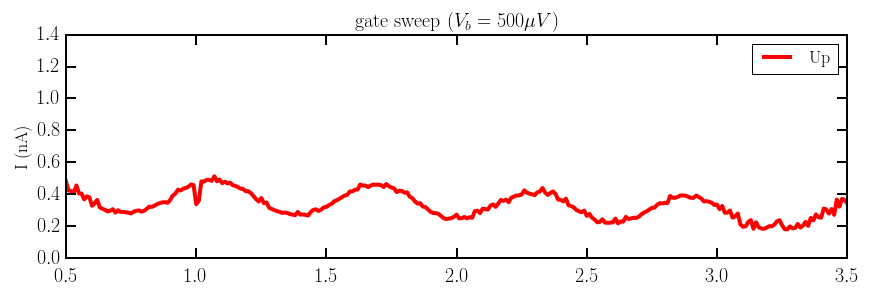

In [8]:
f = data_dir+'gateswp_17-16-6_4K_a.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Iavg']*1e9, c = 'r', label = 'Up')
ax.set_xlim(0.5,3.5)
ax.set_ylim(0,1.4)
ax.set_title('gate sweep ($V_b = 500\mu V$)')
ax.set_ylabel('I (nA)')
ax.legend()

The peak heights are smaller and widths are larger, but in the same locations as the 300mK measurement. The gate values were confirmed by a voltmeter connected between the gate output and sample. I plotted the results of my gate voltage check to be sure...

The slope and intercept are: m = 0.916951011502, b = 0.0007973058631


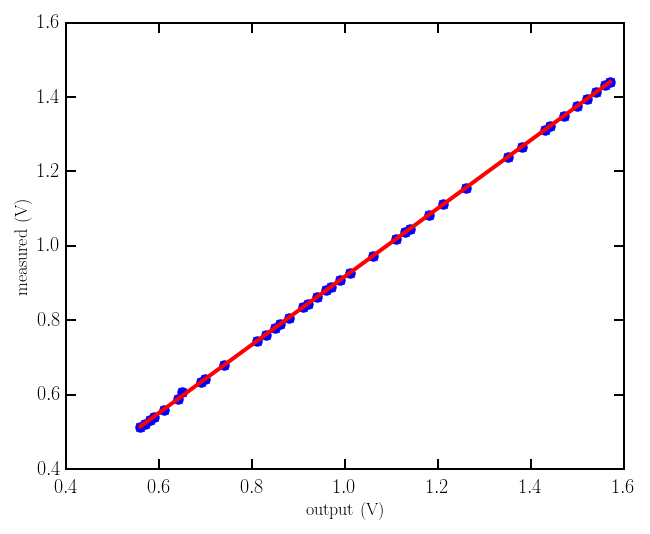

In [10]:
df = pd.read_csv(data_dir+'gate_values.txt', sep = '\t')
df.columns = ['output', 'voltmeter']
z = np.polyfit(df['output'], df['voltmeter'], 1)
p = np.poly1d(z)

print 'The slope and intercept are: m = {}, b = {}'.format(p[1], p[0])

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(df['output'], df['voltmeter'], 'b.', markersize=20)
ax.plot(df['output'].values,p(df['output'].values), 'r-')
ax.set_xlabel('output (V)')
ax.set_ylabel('measured (V)')

That's at least useful to know I'm not crazy. There's a 1MOhm resistor at the output of the DAQ board before the sample, so there must be an 11MOhm short to ground on the DAQ output. That's pretty reasonable, actually.

Here is another attempt at sweeping the bias and gate. This time at 4K

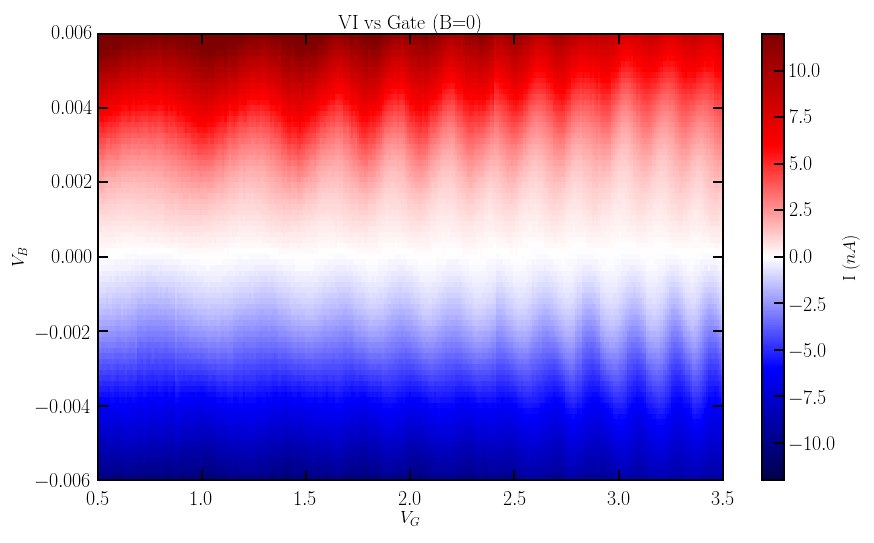

In [11]:
f = data_dir+'vigate_17-16-6_4K_a.bin'

vigate = lvdt.get_data_3d(f)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic, vmin = -12, vmax = 12,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('VI vs Gate (B=0)')
ax.set_xlabel('$V_G$')
ax.set_ylabel('$V_B$')
cb = plt.colorbar(im)
cb.set_label('I $(nA)$')

What is happening? Something is definitely not right here.

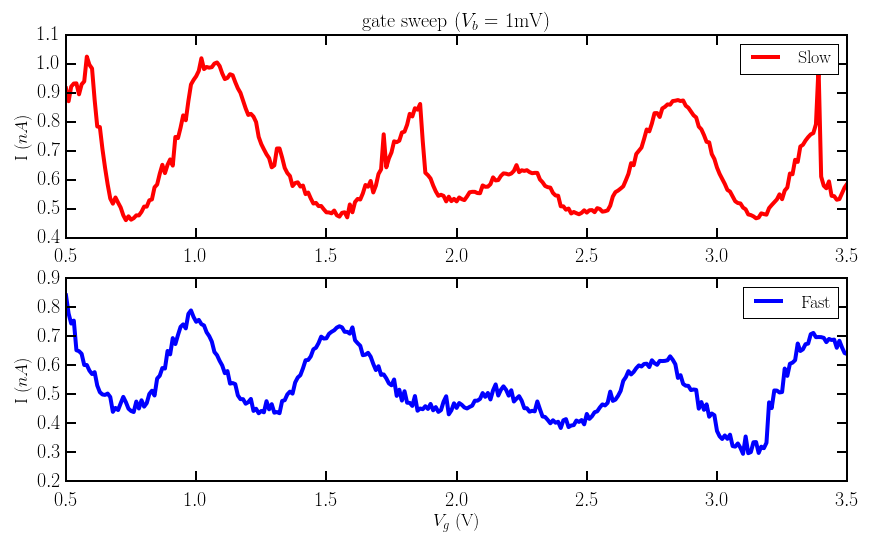

In [12]:
fs = data_dir+'gateswp_17-16-6_4K_tempoff.bin'
ff = data_dir+'gateswp_17-16-6_4K_tempoff_fast.bin'

slowswp = lvdt.get_data_2d(fs)
fastswp = lvdt.get_data_2d(ff)

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(slowswp['Gate'], slowswp['Iavg']*1e9, c = 'r', label = 'Slow')
ax1.set_xlim(0.5,3.5)
ax1.set_title('gate sweep ($V_b$ = 1mV)')
ax1.set_ylabel('I $(nA)$')
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(fastswp['Gate'], fastswp['Iavg']*1e9, c = 'b', label = 'Fast')
ax2.set_xlim(0.5,3.5)
ax2.set_xlabel('$V_g$ (V)')
ax2.set_ylabel('I $(nA)$')
ax2.legend()
#fig.savefig(figure_dir+'17-16_gatesweep_a'+'.png', dpi=200)

No real change there. But in the diamond plots it does seem like there is something time dependent about the diamonds changing width. Some kind of charging effect? Something heating?

I swapped the fast and alow axes on a scan to see if I can tell the difference. Here's the result.

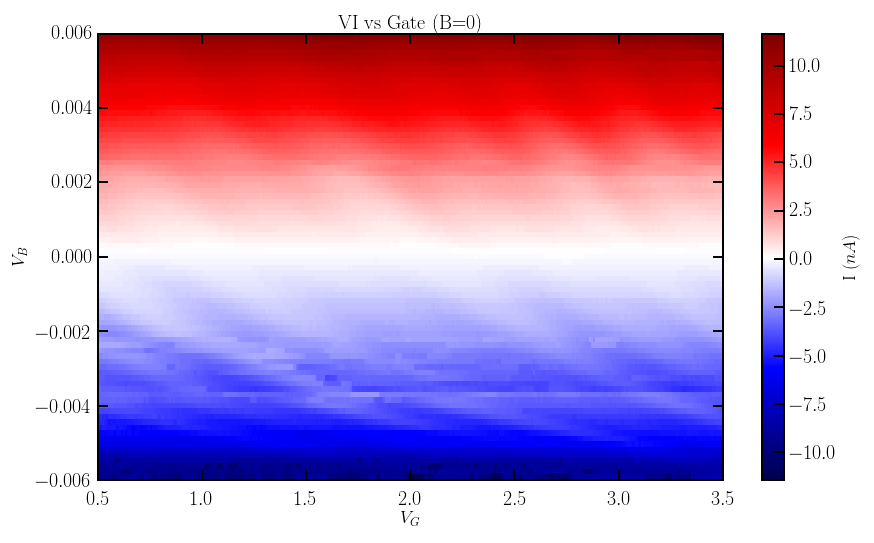

In [13]:
f = data_dir+'vigate_17-16-6_4K_reversed_c.bin'

vigate = lvdt.get_data_3d(f).T
vigate = vigate.groupby(vigate.columns, axis=1).mean()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic, #vmin = -25, vmax = 25,
           origin = 'lower', aspect = 'auto', interpolation = 'Nearest')
ax.set_title('VI vs Gate (B=0)')
ax.set_xlabel('$V_G$')
ax.set_ylabel('$V_B$')
cb = plt.colorbar(im)
cb.set_label('I $(nA)$')

I checked the gain on the bias voltage. It works as expected.

Here is one quick attempt at measuring the stability. More to come.

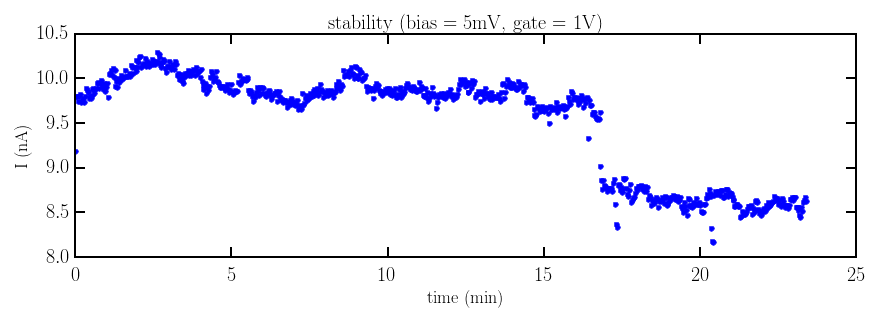

In [15]:
f = data_dir+'stability_17-16-6_4K_a.bin'

stability = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['T']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,1.4)
ax.set_title('stability (bias = 5mV, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

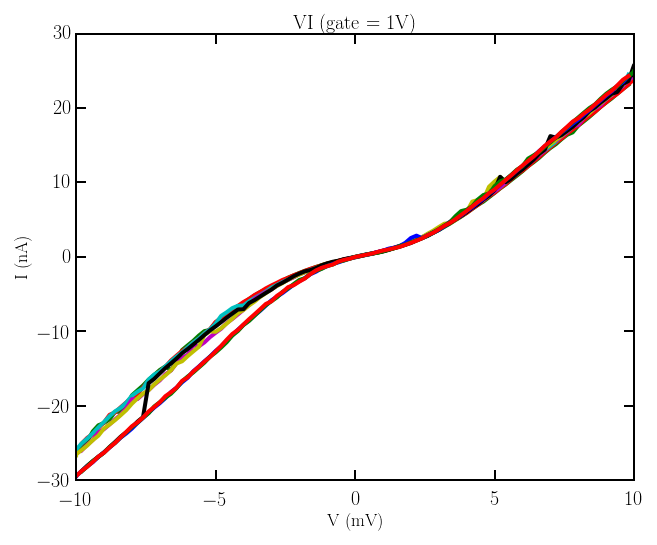

In [17]:
f = data_dir+'VI_17-16-6_4K_a.bin'

allVI = lvdt.get_data_2d(f)
allVI.rename(columns={'Gate':'Bias'}, inplace=True)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ind = lvdt.split_sweeps(allVI, 'Bias')
for i in range(len(ind)-1):
    ax.plot(allVI['Bias'][ind[i-1]:ind[i]]*1e3, allVI['Iavg'][ind[i-1]:ind[i]]*1e9,)
ax.set_title('VI (gate = 1V)')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')

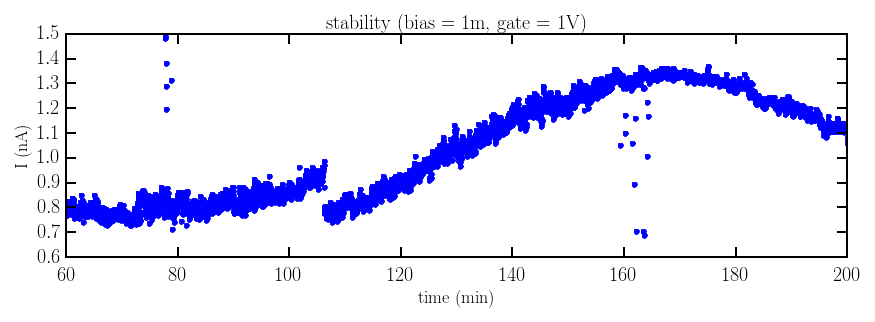

In [18]:
f = data_dir+'stability_17-16-6_4K_b.bin' #this file is a little messed up because of some column naming problem

data = np.fromfile(f,'>d')
data = data.reshape((-1,data[0]))
data = data.byteswap().newbyteorder()
col_names = ['size', 'time', 'Iavg', 'Istd', 'time']
stability = pd.DataFrame(data, columns=col_names)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(60,200)
#ax.set_ylim(0,1.4)
ax.set_title('stability (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')
ax.legend()

For the record, those slow oscillations have a frequency of ~2/day. Maybe my voltage source is not stable enough?

The random switching doesn't really concern me. It's the slow drift that seems strange. Maybe there is something about the cryostat wiring? It's also possible I have some ground loop problems somewhere in this setup. I did just assemble everything a few days ago.

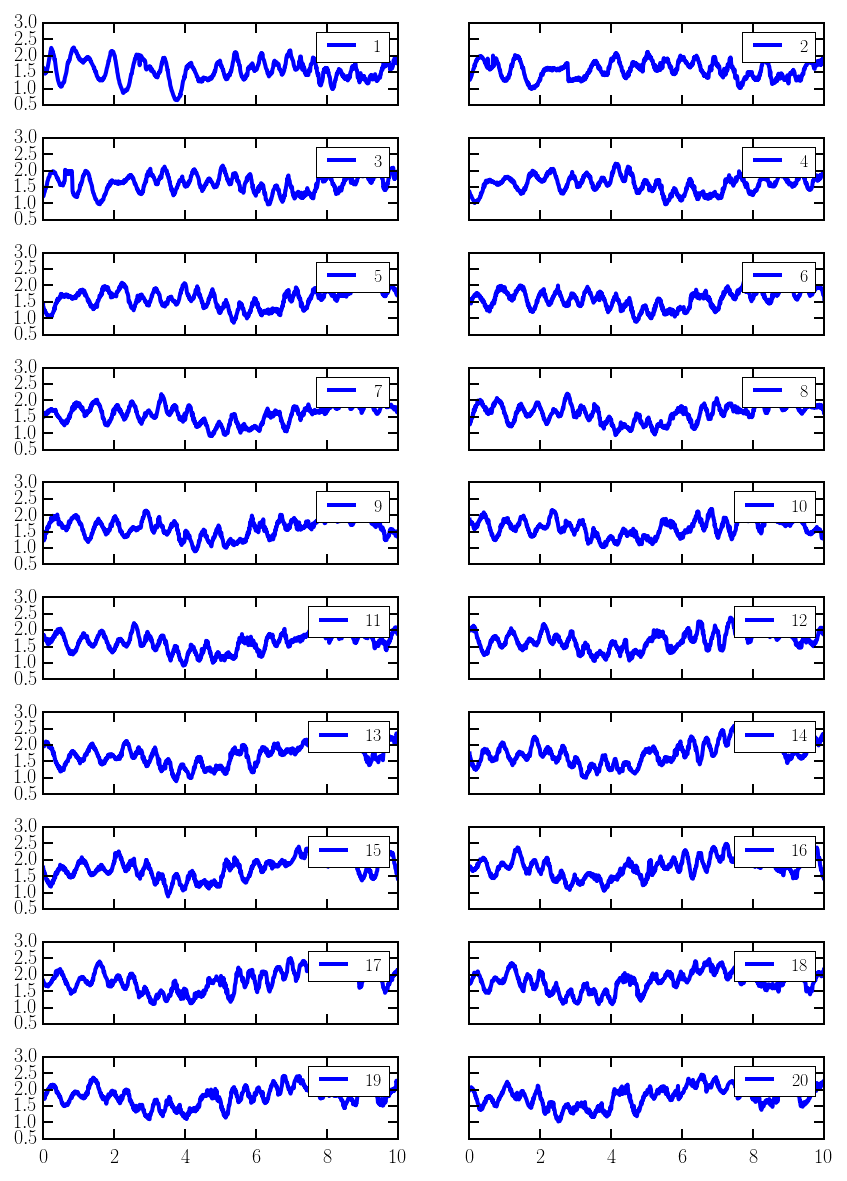

In [21]:
f = data_dir+'gateswp_17-16-6_4K_long_a.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 up and 10 down sweeps in here

fig, axs = plt.subplots(10,2,sharex = True, sharey=True, 
                        figsize=(14,20))
axs = axs.flat
fig.subplots_adjust(hspace = 0.4)

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*-1e9,
                label=i+1)
    axs[i].legend()
#ax.set_title('VI (gate = 1V)')
#ax.set_xlabel('Gate (V)', fontsize = 14)
#ax.set_ylabel('I (nA)', fontsize=14)
#ax.legend()

Try to follow some peaks on those plots above. Increasing numbers represent later times. Left column are up sweeps, right column are down. Follow a column from top to bottom for consistency. The peaks all drift left pretty significantly. 

If this is due to an ustable voltage source, then it must drift at ~1V/hr or less.

Did my best to clean up the grounding situation. Definitely removed a lot (like 4 orders of magnitude) of 60Hz noise. Testing again...

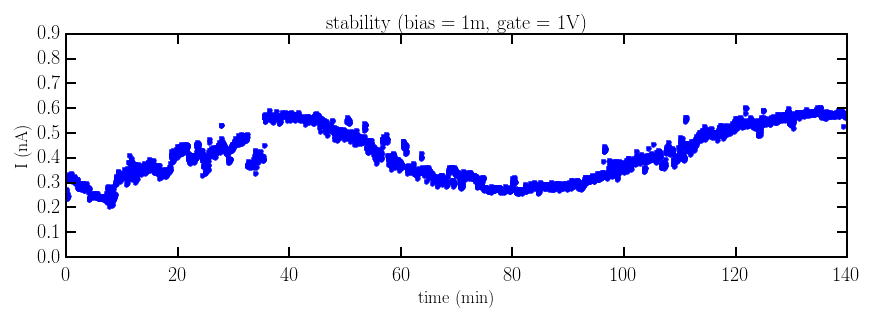

In [22]:
f = data_dir+'stability_17-16-6_4K_e.bin'

stability = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(0,140)
ax.set_ylim(0,0.9)
ax.set_title('stability (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

That's not any better. It looks like the same oscillation that I'm measuring with a period of ~110min. Here's another crazy problem...

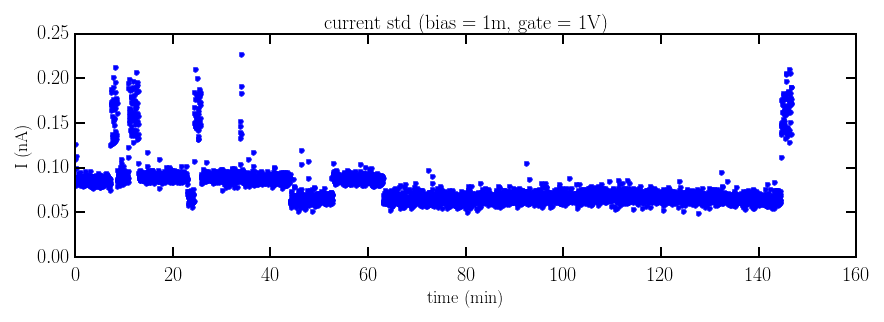

In [23]:
f = data_dir+'stability_17-16-6_4K_e.bin'

stability = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Istd']*1e9, 'b.', ms = 10)
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,0.9)
ax.set_title('current std (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

This is the standard deviation for every 1s current sample. Those points where the noise doubles are when I logged into the computer remotely from my laptop. Crazy. But, maybe that is a hint that the problem is with the DAQ output/DAQ input/computer power supply? 

Here are some additional gate sweeps after cleaning up the ground loops.

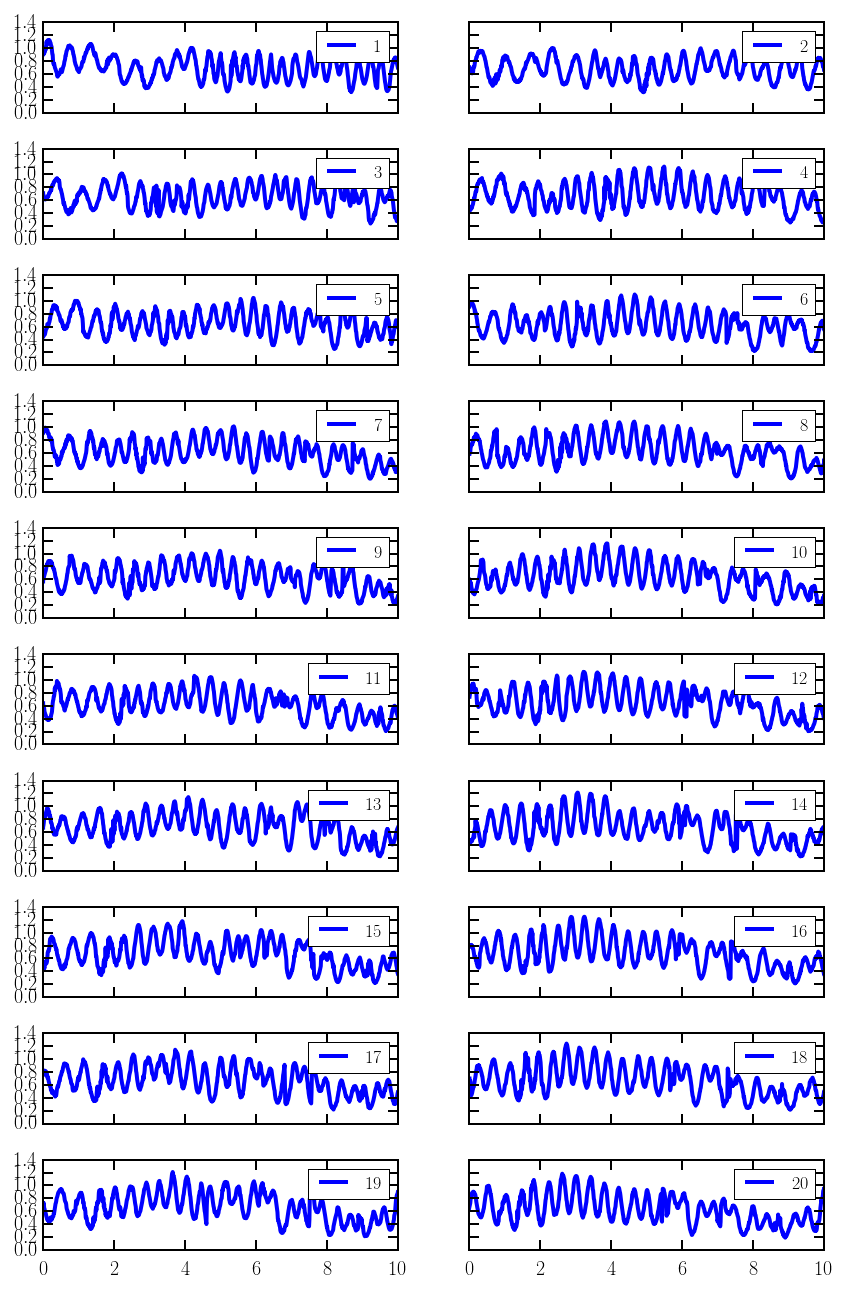

In [26]:
f = data_dir+'gateswp_17-16-6_4K_long_b.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 up and 10 down sweeps in here

fig, axs = plt.subplots(10,2,sharex = True, sharey=True, 
                        figsize=(14,22))
axs = axs.flat
fig.subplots_adjust(hspace = 0.4)

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*-1e9,
                label=i+1)
    axs[i].legend()

Definitely looks a little better than my previous attempt. It also looks totally different.

A lot of data was collected compariing several input/output methods. Here is a summary...

(0, 140)

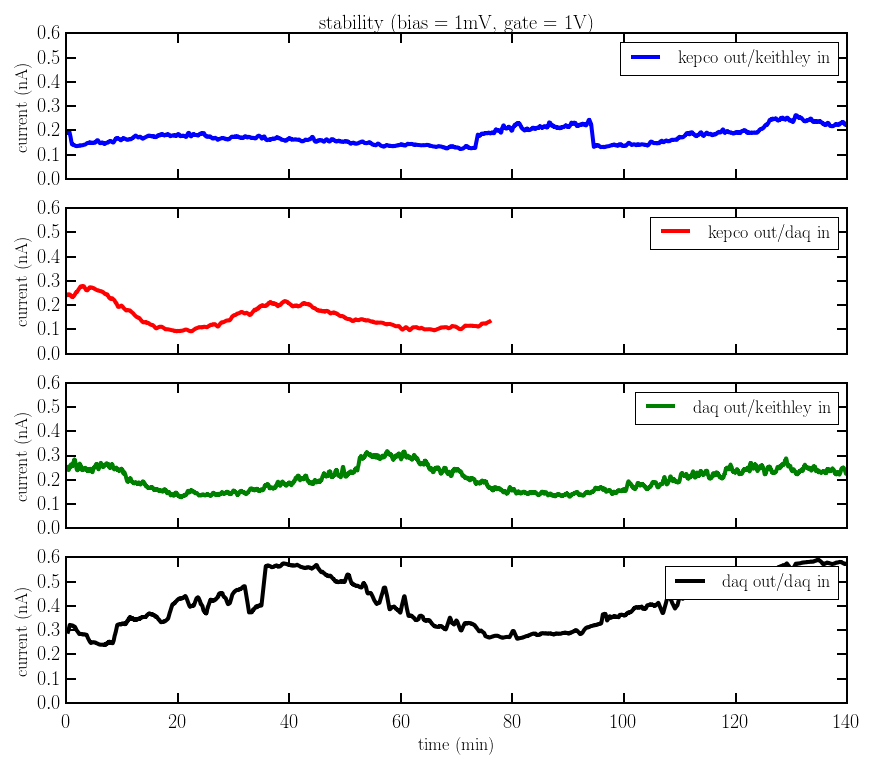

In [27]:
kk = data_dir+'stability_17-16-6_Kepco-2182_4K_a.bin' #kepco and keithley
kd = data_dir+'stability_KepcoOut_DAQIn_17-16-6_4K_c.bin' #kepco and daq
dk = data_dir + 'stability_17-16-6_2182in_4K_c.bin' #daq and keithley
dd = data_dir+'stability_17-16-6_4K_e.bin' #daq and daq

f = [kk, kd, dk, dd]
labels = ['kepco out/keithley in', 'kepco out/daq in', 'daq out/keithley in', 'daq out/daq in']
colors = ['b','r','g','k']

fig, axs = plt.subplots(4,1,sharex = True, sharey=True, 
                        figsize=(14,12))
axs=axs.flat

for i in range(len(axs)):
    df = pd.rolling_mean(lvdt.get_data_2d(f[i]), 25)
    axs[i].plot(df.iloc[:,1]/60.0, df.iloc[:,2]*1e9, '-', c=colors[i], label=labels[i])
    axs[i].set_ylabel('current (nA)')
    axs[i].legend()

axs[0].set_title('stability (bias = 1mV, gate = 1V)')
axs[3].set_xlabel('time (min)')
axs[3].set_xlim(0,140)

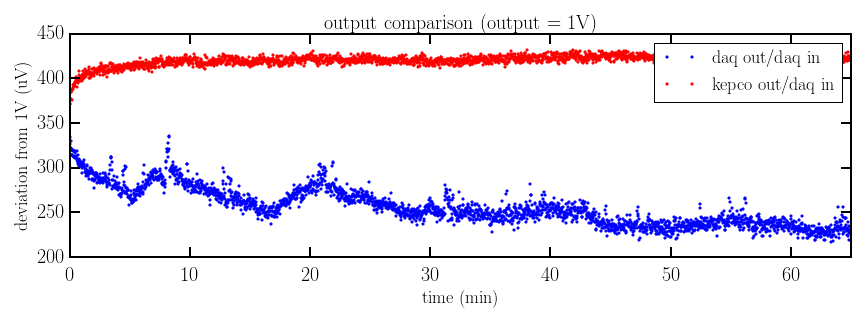

In [28]:
d = data_dir+'stability_output1_input1_a.bin'
k = data_dir+'stability_kepco_check_DAQ_read_c.bin'

daq = lvdt.get_data_2d(d)
kepco = lvdt.get_data_2d(k)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(daq['time']/60.0, abs(daq['Iavg']*1e7 + 1)*1e6, 'b.', ms = 5, label='daq out/daq in')
ax.plot(kepco['time']/60.0, abs(kepco['Iavg']*1e7 + 1)*1e6, 'r.', ms = 5, label='kepco out/daq in')
ax.set_xlim(0,65)
#ax.set_ylim(0,0.9)
ax.set_title('output comparison (output = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('deviation from 1V (uV)')
ax.legend()

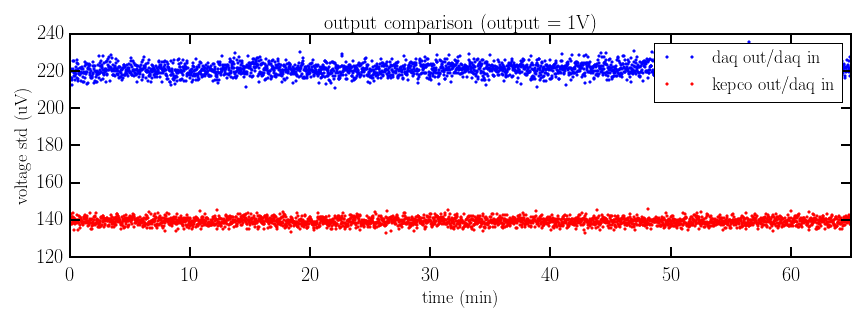

In [29]:
fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(daq['time']/60.0, (daq['Istd']*1e7)*1e6, 'b.', ms = 5, label='daq out/daq in')
ax.plot(kepco['time']/60.0, (kepco['Istd']*1e7)*1e6, 'r.', ms = 5, label='kepco out/daq in')
ax.set_xlim(0,65)
#ax.set_ylim(20,25)
ax.set_title('output comparison (output = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('voltage std (uV)')
ax.legend()

The Kepco/Keithley combination seems to be the best choice. Although, it's still not great. Maybe there is some issue with the cryostat wiring. Mabye there is some issue with the computer power supply. 

The other alternative here is to switch to doing an AC measurement with the Kepco/SR830.

Swapped out the computer power supply and replaced the noisy fan. Decided to keep testing with the Kepco out/DAQ in combination, because that was the cleanest signal with the most clear problem.

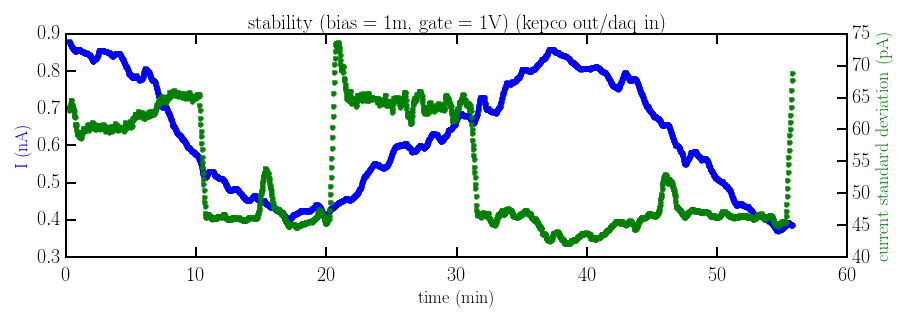

In [31]:
f = data_dir+'stability_17-16-6_DAQ-Kepco-new-supply-fan.bin'

stability = pd.rolling_mean(lvdt.get_data_2d(f), 20)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(0,60)
#ax.set_ylim(0,0.9)
ax.set_title('stability (bias = 1m, gate = 1V) (kepco out/daq in)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

ax2 = ax.twinx()
ax2.plot(stability['time']/60.0, stability['Istd']*1e12, 'g.', ms = 10)
ax2.set_ylabel('current standard deviation (pA)')

ax.yaxis.label.set_color('b')
ax2.yaxis.label.set_color('g')

It's not the ethernet card that is causing this noise. It is the display turning on and off. You can see the 10 minute delay between the display turning on and windows shutting it back off. Turning off the power to the display while running measurements works fine. Unfortunately, none of this is what is causing the drift in measured current through the nanotube.

I can prove it, here is the same exact measurement connected to a 2MOhm resistor, not the breakout box/cryostat/nanotube.

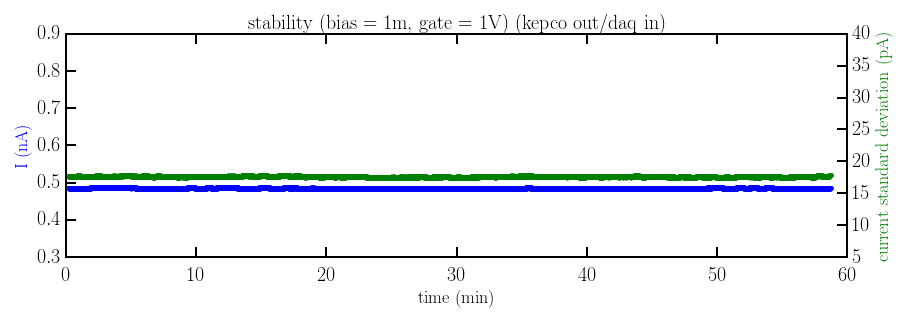

In [32]:
f = data_dir+'stability_2MOhm_DAQ-Kepco-new-supply-fan_b.bin'

stability = pd.rolling_mean(lvdt.get_data_2d(f), 20)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(0,60)
ax.set_ylim(0.3, 0.9)

ax.set_title('stability (bias = 1m, gate = 1V) (kepco out/daq in)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

ax2 = ax.twinx()
ax2.plot(stability['time']/60.0, stability['Istd']*1e12, 'g.', ms = 10)
ax2.set_ylim(5,40)
ax2.set_ylabel('current standard deviation (pA)')

ax.yaxis.label.set_color('b')
ax2.yaxis.label.set_color('g')

Sweeping the gate in different magnetic field.  The sample is in the wrong direction, but it's cold, so why not.

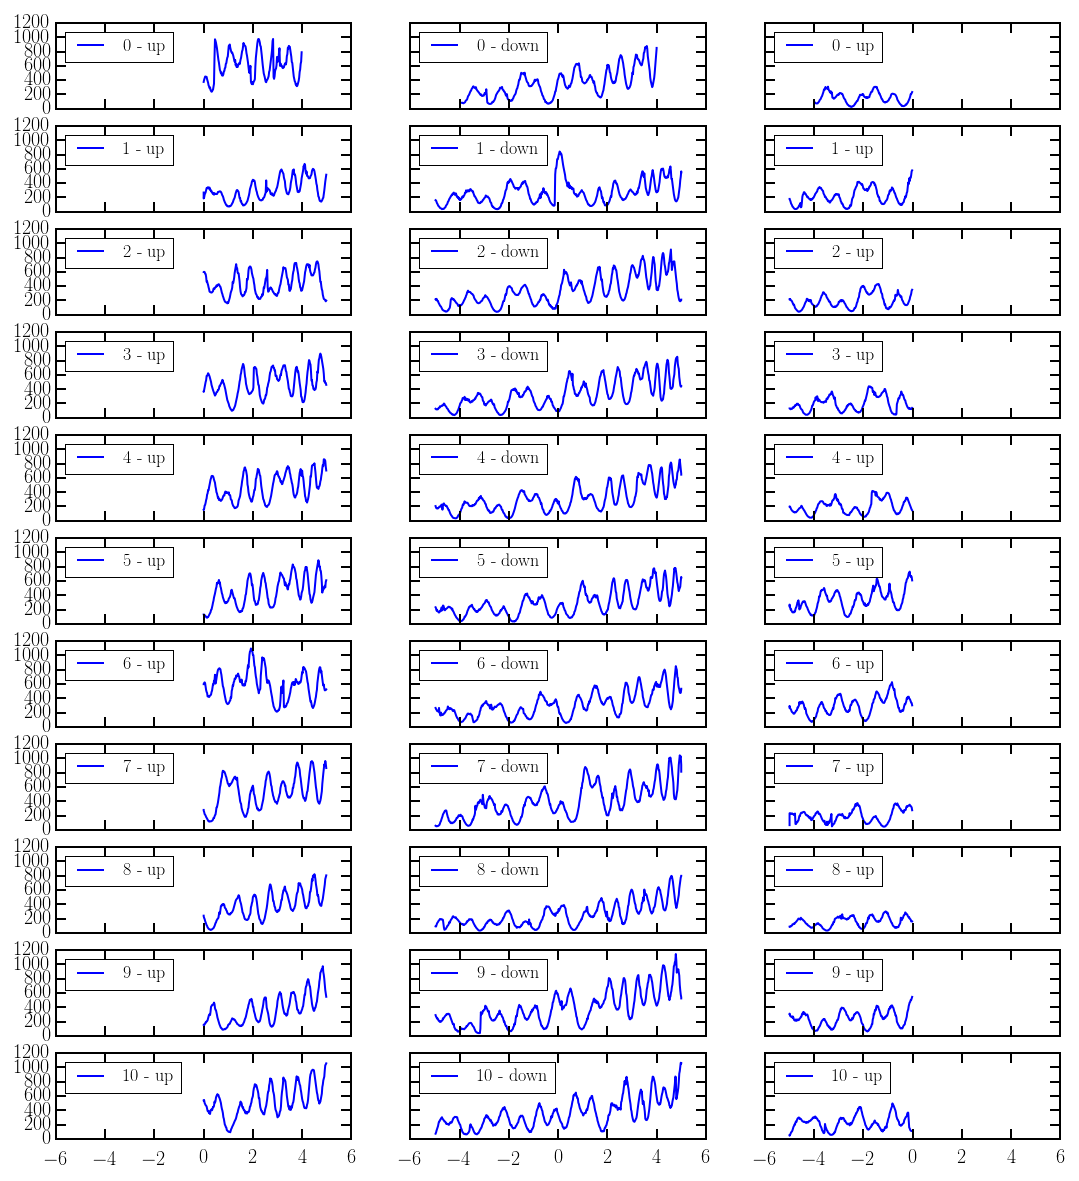

In [34]:
# T = 4K, B = 0T
# bias = 1mV

# something weird happened with the sweep labeled '0'
# probably best to ignore it for now

f = data_dir+'gateswp_17-16-6_4K-0T_c.bin'

gateswp = lvdt.get_data_2d(f) #there are 11 'symmetric about start' sweeps in here
bias = 1e-3

fig, axs = plt.subplots(11,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3)
    else:
        l = '{0:d} - up'.format((i-2)/3)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

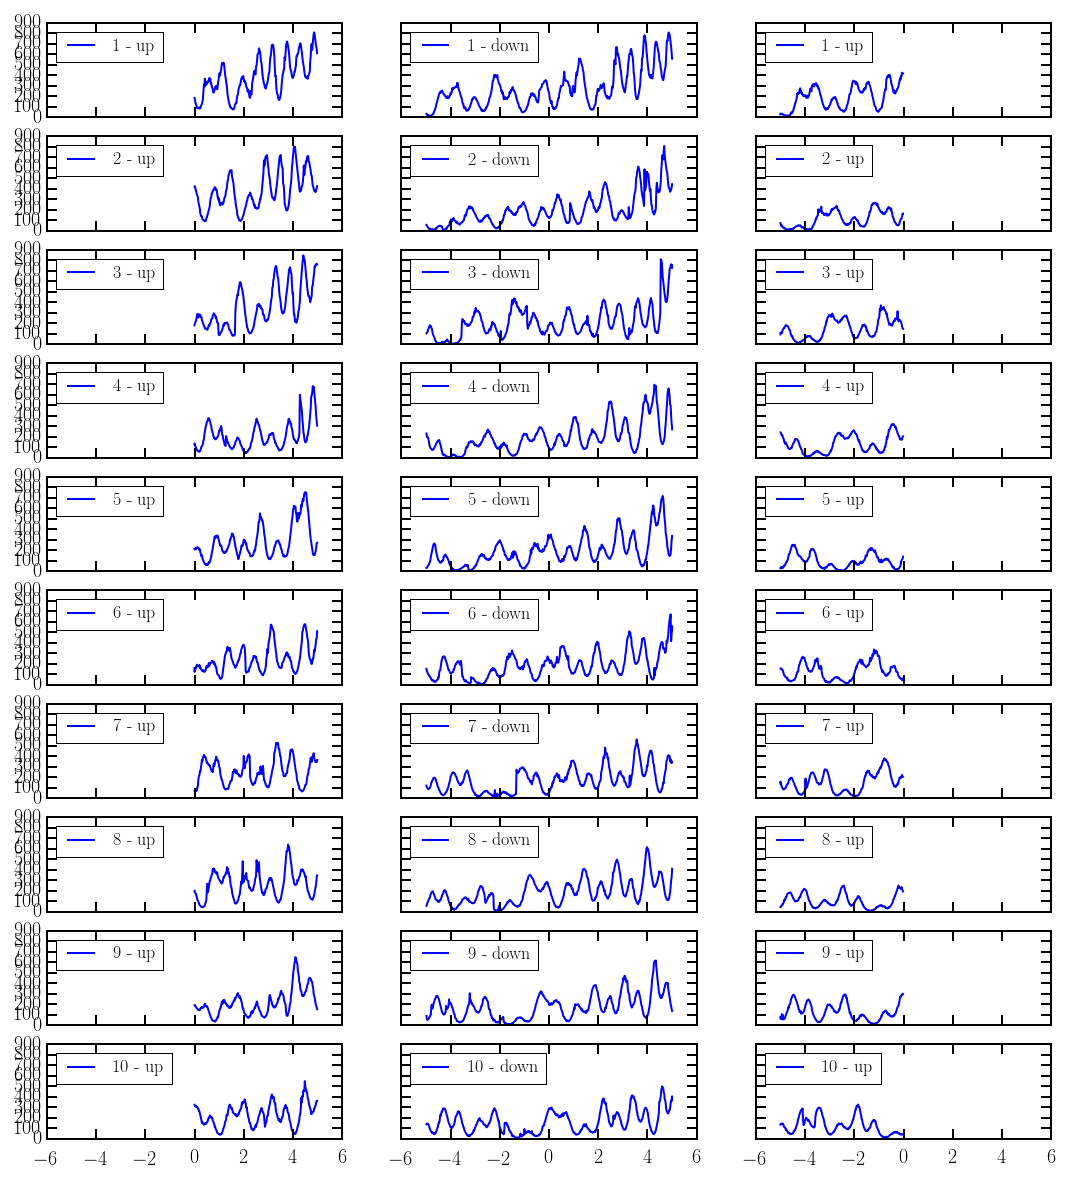

In [35]:
# T = 4K, B = 3T
# bias = 1mV

f = data_dir+'gateswp_17-16-6_4K-3T_a.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 'symmetric about start' sweeps in here
bias = 1e-3

fig, axs = plt.subplots(10,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

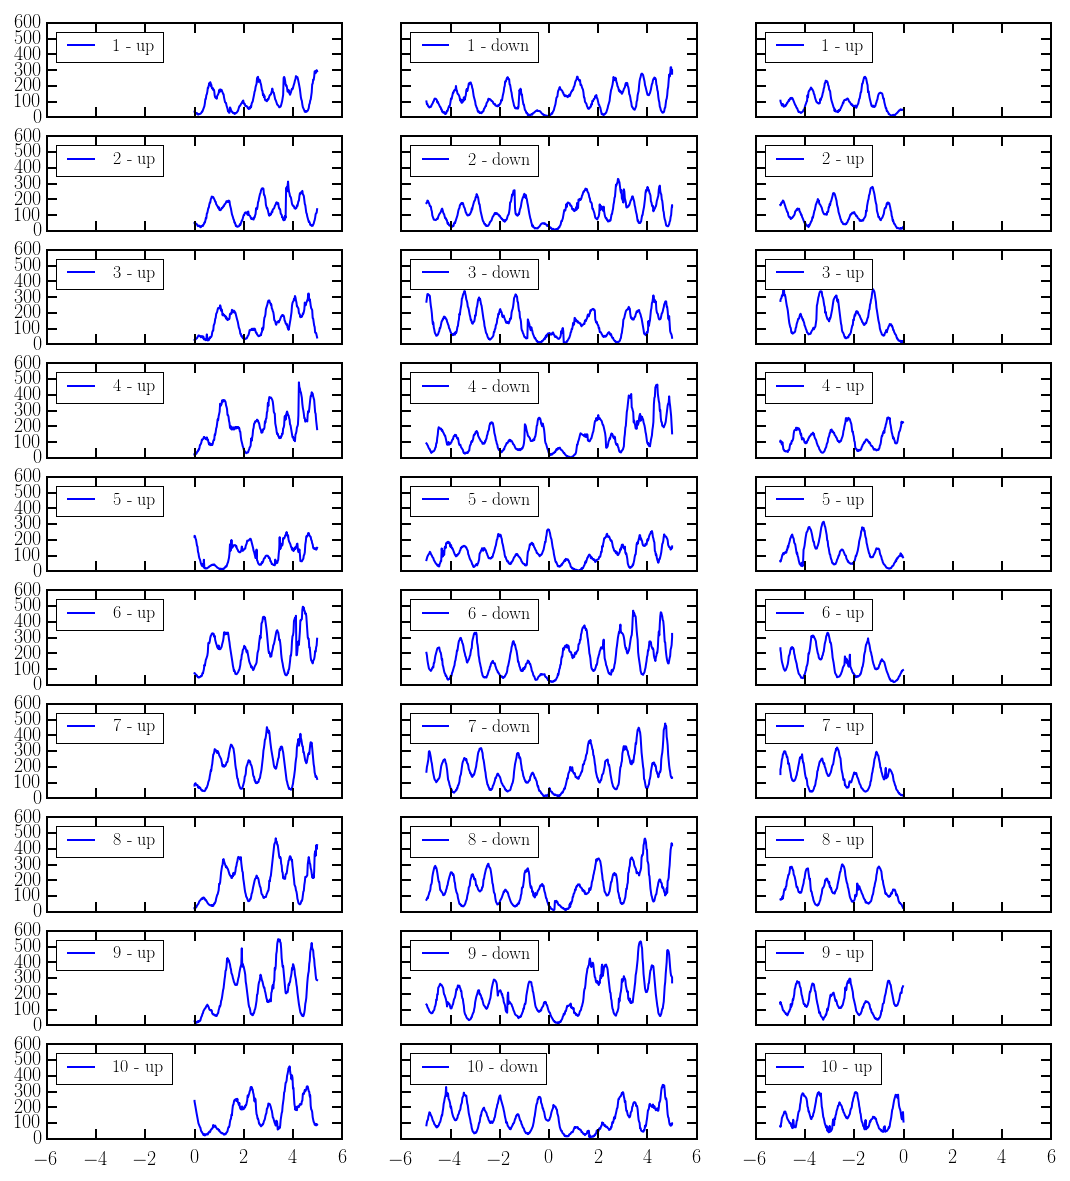

In [36]:
# T = 4K, B = 6T
# bias = 1mV

f = data_dir+'gateswp_17-16-6_4K-6T_a.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 'symmetric about start' sweeps in here
bias = 1e-3

fig, axs = plt.subplots(10,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

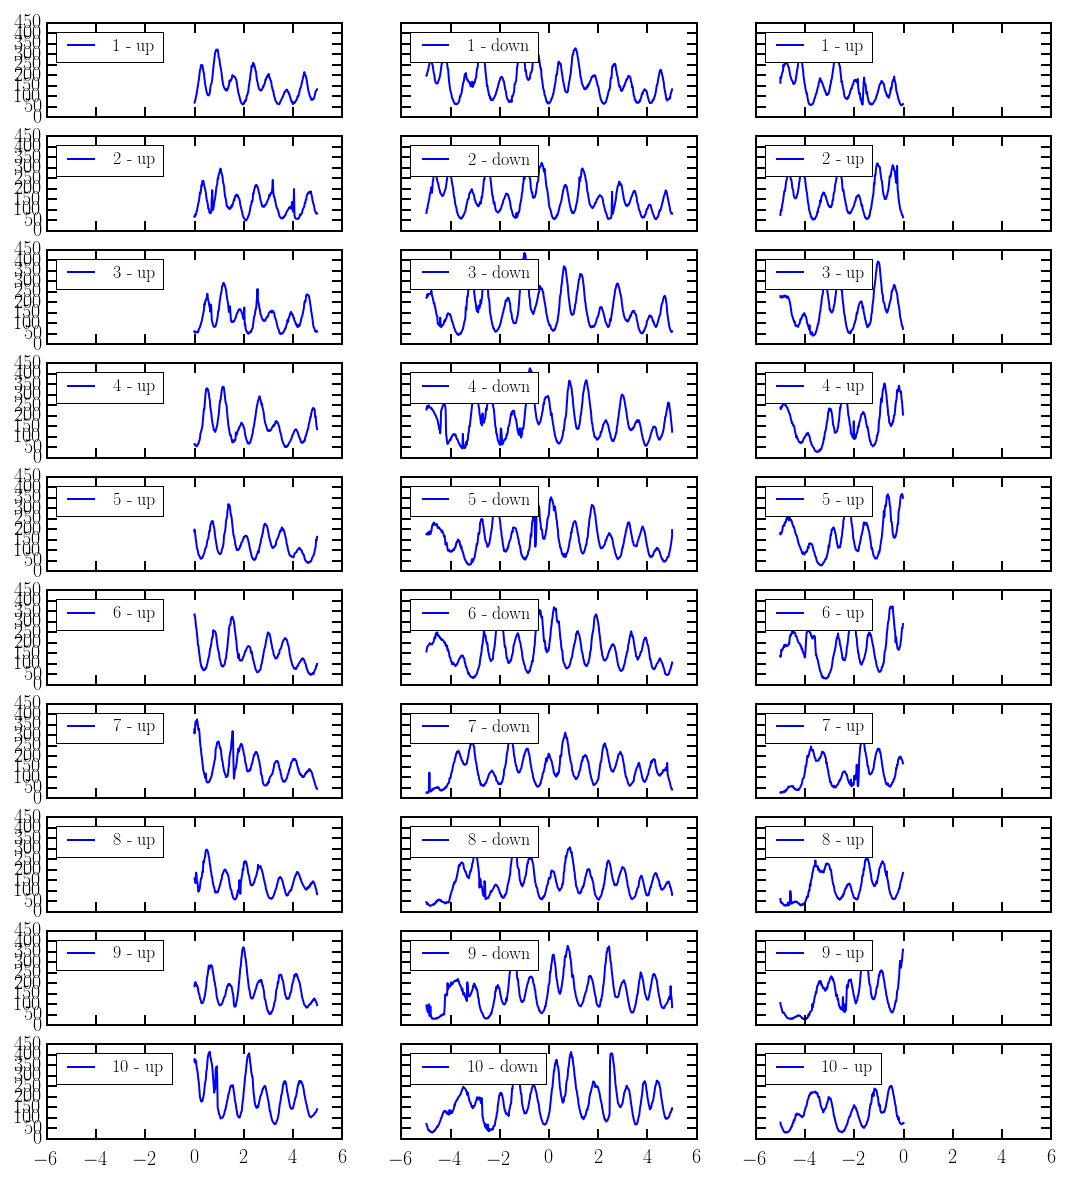

In [37]:
# T = 4K, B = 0T
# bias = -1mV

f = data_dir+'gateswp_17-16-6_4K-0T_d.bin'

gateswp = lvdt.get_data_2d(f) #there are 11 'symmetric about start' sweeps in here
bias = -1e-3

fig, axs = plt.subplots(10,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

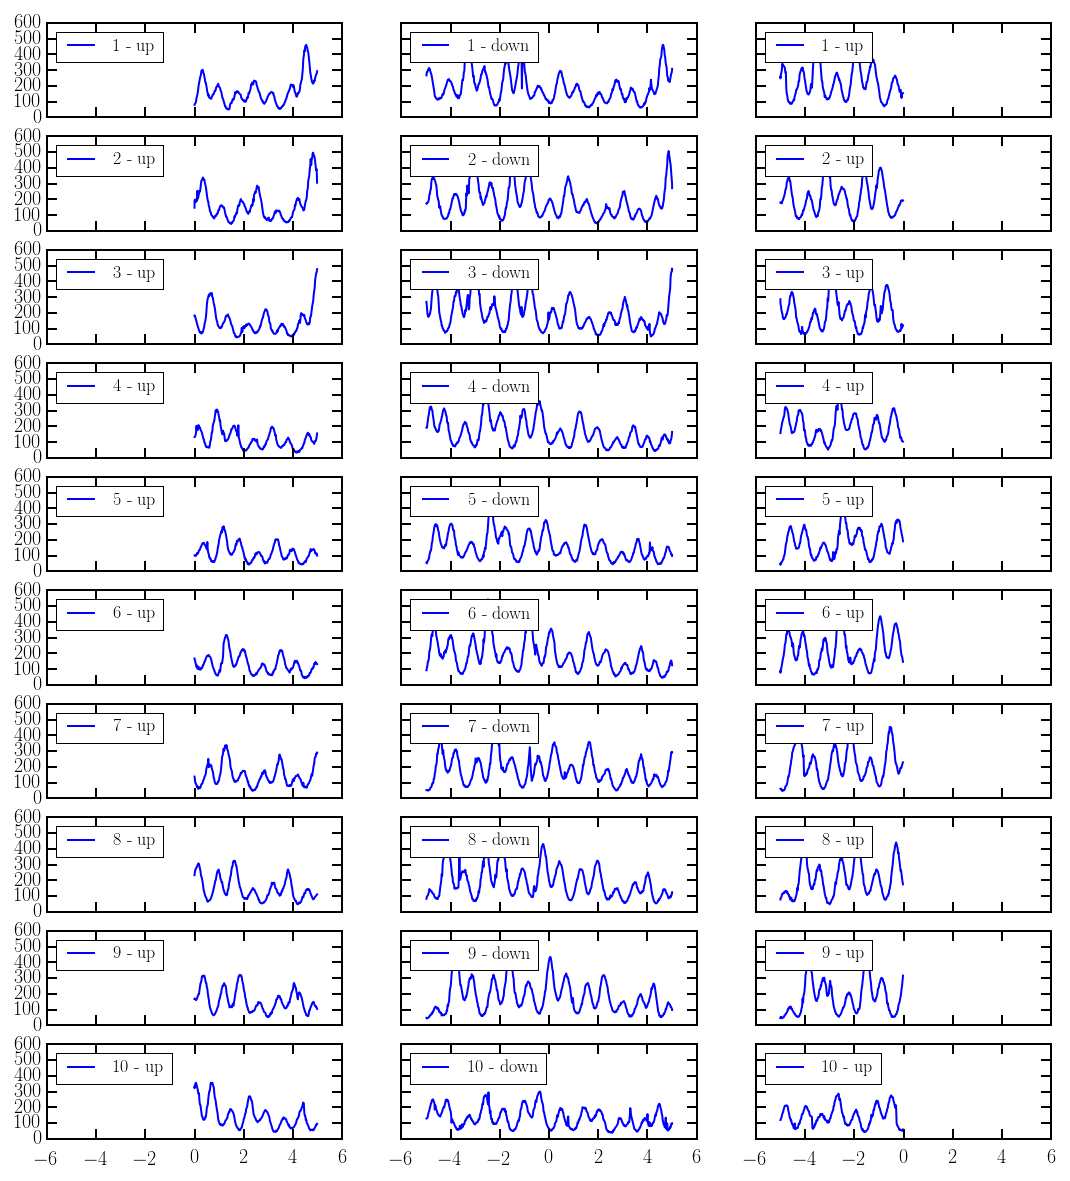

In [38]:
# T = 4K, B = 3T
# bias = -1mV

f = data_dir+'gateswp_17-16-6_4K-3T_b.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 'symmetric about start' sweeps in here
bias = -1e-3

fig, axs = plt.subplots(10,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

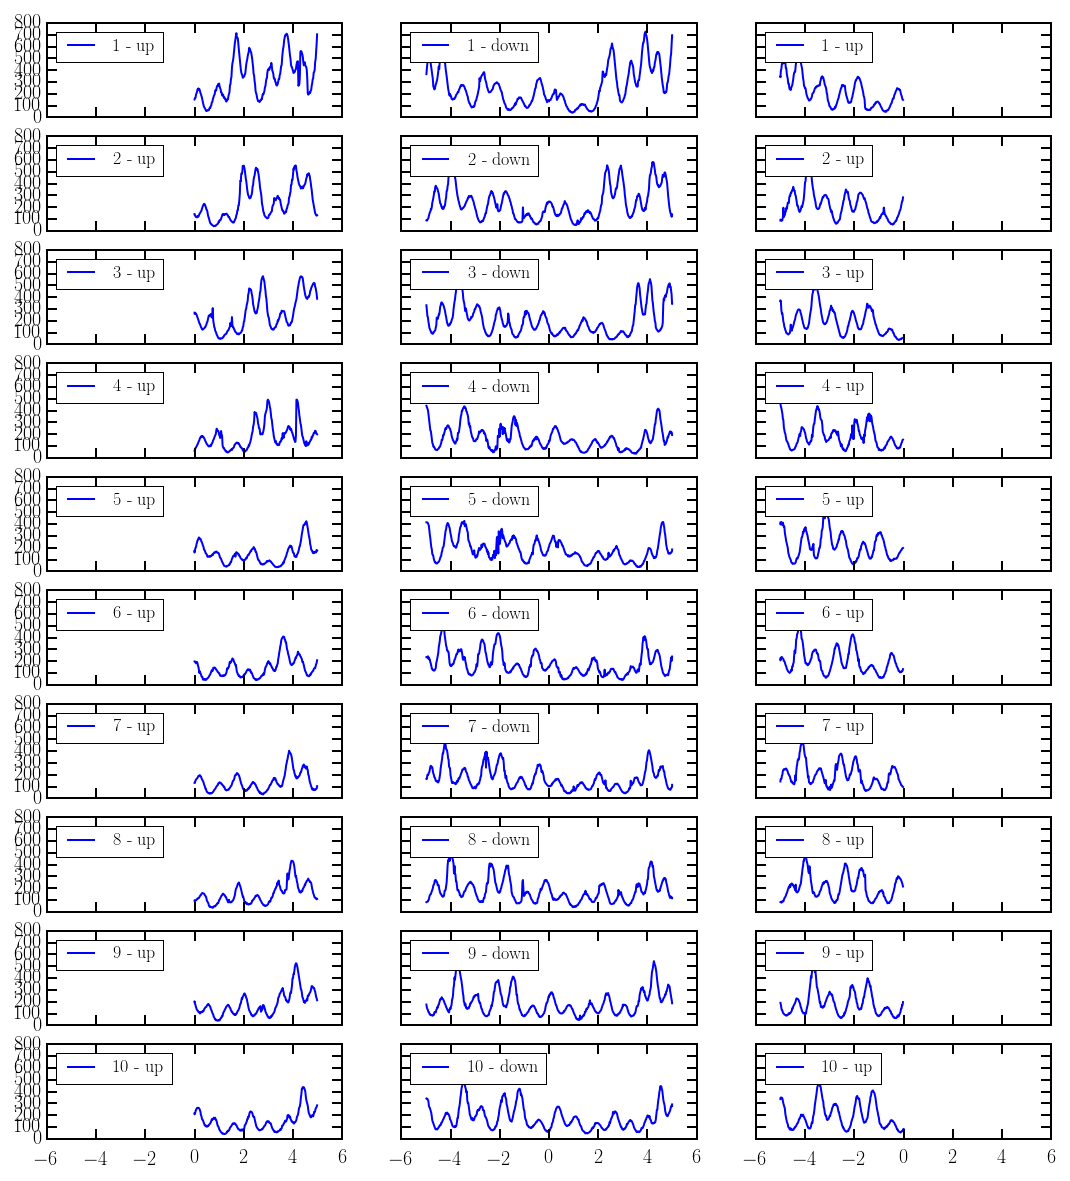

In [39]:
# T = 4K, B = 6T
# bias = -1mV

f = data_dir+'gateswp_17-16-6_4K-6T_b.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 'symmetric about start' sweeps in here
bias = -1e-3

fig, axs = plt.subplots(10,3,sharex = True, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

I also tried sweeping only negative gate values and only positive gate values to see what is going on with this drifting problem.

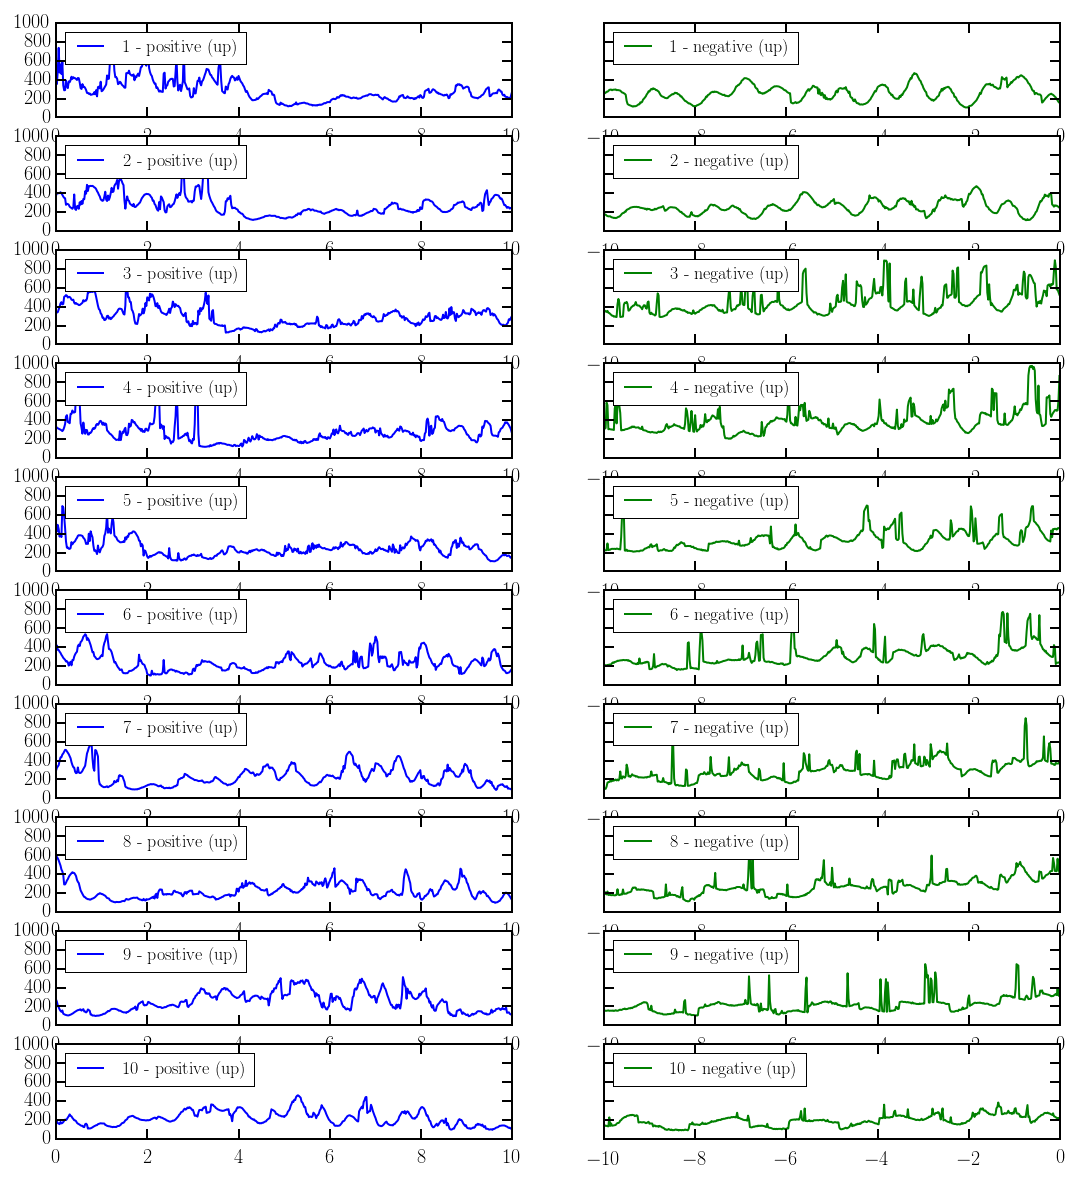

In [42]:
n = data_dir+'gateswp_17-16-6_4K-0T_g.bin'
p = data_dir+'gateswp_17-16-6_4K-0T_f.bin'

neggate = lvdt.get_data_2d(n) #there are 10 'there and back' sweeps in here
posgate = lvdt.get_data_2d(p) #there are 10 'there and back' sweeps in here
bias = 1e-3

fig, axs = plt.subplots(10,2,sharex = False, sharey=True, 
                        figsize=(18,20))
axs = axs.flat

ind = lvdt.split_sweeps(neggate, 'Gate') #should be the same for positive gate

for i in range(len(ind)-1):
    if i%2 == 0:
        df = posgate.iloc[ind[i]:ind[i+1],1:4]
        lc = 'b'
        l = '{0:d} - positive (up)'.format(i/2 + 1)
    elif i%2 ==1:
        df = neggate.iloc[ind[i]:ind[i+1],1:4]
        lc = 'g'
        l = '{0:d} - negative (up)'.format((i-1)/2 + 1)
        
    df = pd.rolling_mean(df, 1)
    axs[i].plot(df['Gate'], df['Iavg']*1e9/bias,
            c = lc, lw = 2, label=l)
    
    axs[i].legend(loc = 'upper left')

I don't know what's up with all of the noise today, but I think it's true that the positive gate values are drifting left while the negative gate values are drifting right. There might also be some dependence on dV_g/dt. 

I swapped out the fisher cable and breakout box to see if this might fix the stability issue.

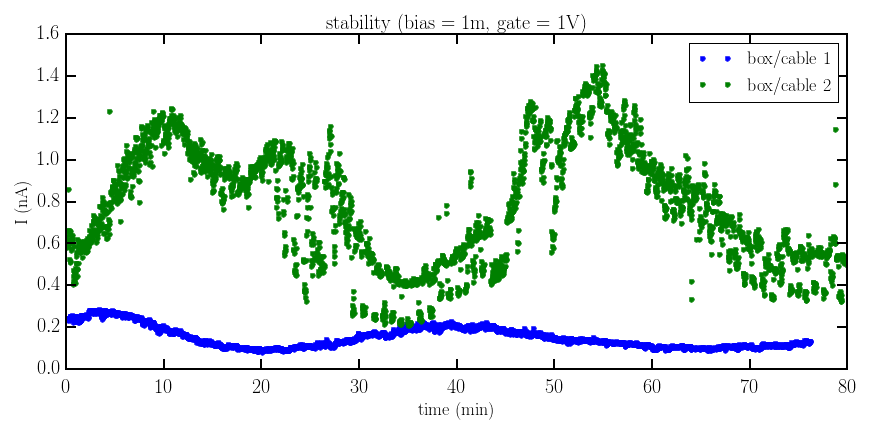

In [41]:
b1 = data_dir+'stability_KepcoOut_DAQIn_17-16-6_4K_c.bin'
b2 = data_dir+'stability_17-16-6_newcable_4K_0T_a.bin'

box1 = lvdt.get_data_2d(b1)
box2 = lvdt.get_data_2d(b2)

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,1,1)
ax.plot(box1['time']/60.0, box1['Iavg']*1e9, 'b.', ms = 10, label='box/cable 1')
ax.plot(box2['time']/60.0, box2['Iavg']*1e9, 'g.', ms = 10, label='box/cable 2')
ax.set_xlim(0,80)
#ax.set_ylim(0,0.9)
ax.set_title('stability (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')
ax.legend()

The noise in that green plot seems to be coming from somewhere else. It was in my data from yesterday too. Maybe the magnet supply? That means the drifting problem originates somewhere in the cryostat or on the sample. Going to check an adjacent quantum dot to this one to see if the problem is there as well.

# 17-20 Permalloy/Permalloy

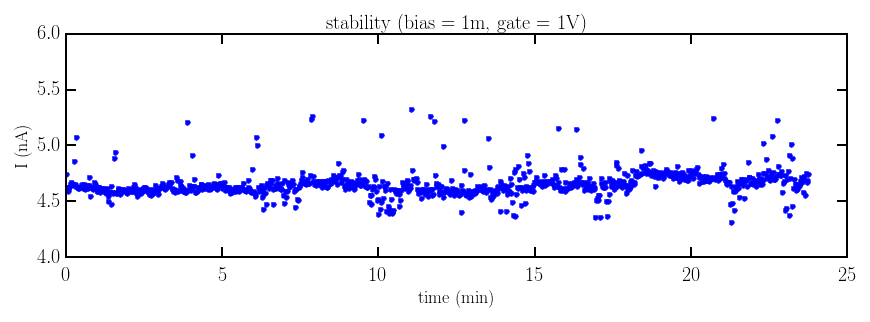

In [43]:
f = data_dir+'stability_17-20-6_4K_0T_a.bin'

stability = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(0,25)
ax.set_ylim(4,6)
ax.set_title('stability (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

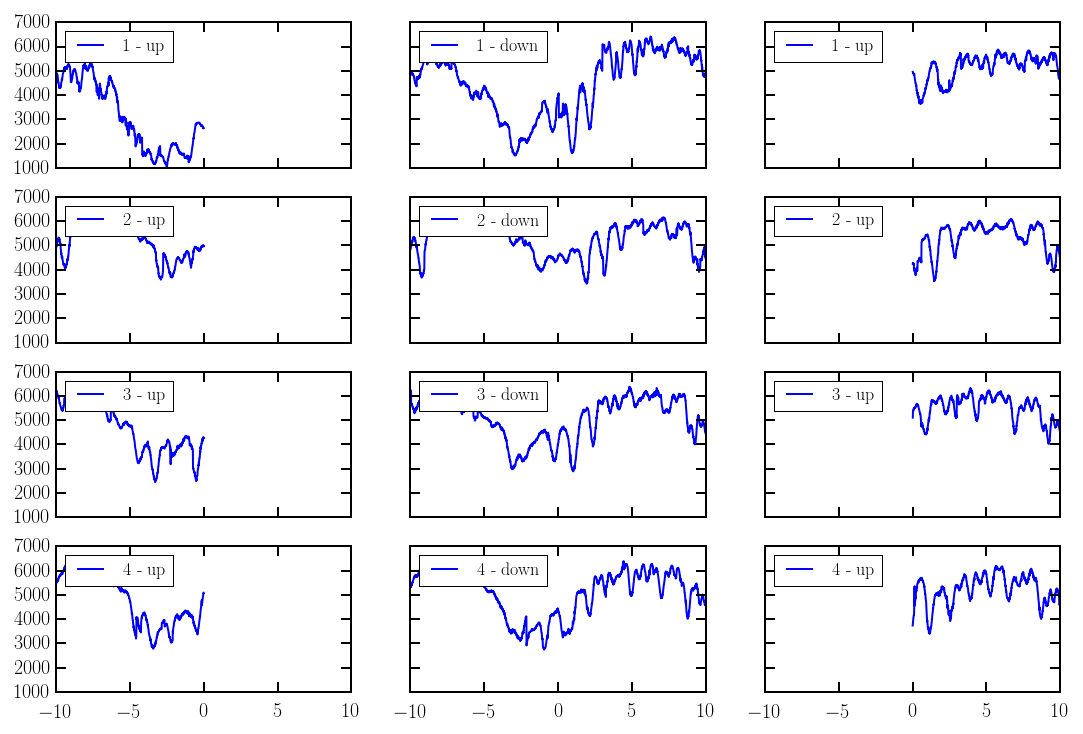

In [44]:
f = data_dir+'gateswp_20-17-6_4K-0T_a.bin'

gateswp = lvdt.get_data_2d(f) #there are 10 'symmetric about start' sweeps in here
bias = 1e-3

fig, axs = plt.subplots(4,3,sharex = True, sharey=True, 
                        figsize=(18,12))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
                lw = 2, label=l)
    axs[i].legend(loc = 'upper left')

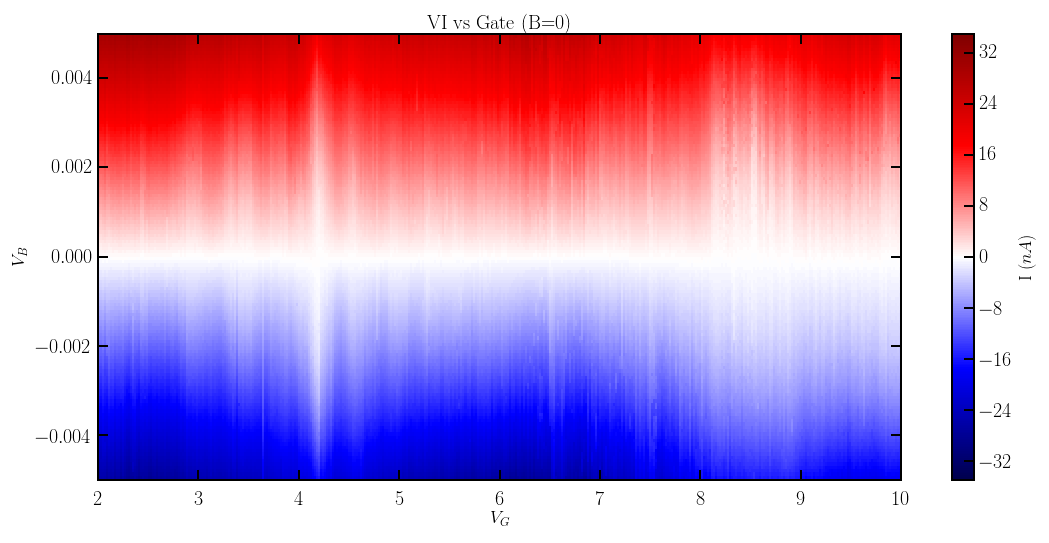

In [45]:
f = data_dir+'vigate_20-17-6_4K_0T_a.bin'

#vigate = lvdt.get_data_3d(f)
data = np.fromfile(f,'>d') #this file pretty messed up
data = data.byteswap().newbyteorder()

bias = data[73:475]
gate = np.arange(2,10.02,0.02)

data = data[72:]

df = pd.DataFrame(index=bias, columns=gate)

#this is going to get real ugly
sdata = np.around(data, 2) # to fix float == float trouble
sgate = np.around(gate, 2) # same
for i in range(len(gate)-1):
    start = np.where(sdata == sgate[i])[0][0]
    stop = np.where(sdata == sgate[i+1])[0][0]
    vi = data[start+1:stop]    
    df.iloc[0:len(vi),i] = vi
vi = data[stop:]    
df.iloc[0:len(vi),-1] = vi

# all the rows 230: have some NaN in them
df = df.iloc[0:202,:].astype(float) # this covers just one bias sweep going up

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
           cmap = plt.cm.seismic, vmin = -35, vmax = 35,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('VI vs Gate (B=0)')
ax.set_xlabel('$V_G$')
ax.set_ylabel('$V_B$')
ax.set_ylim(-0.005, 0.005)

cb = plt.colorbar(im)
cb.set_label('I $(nA)$')

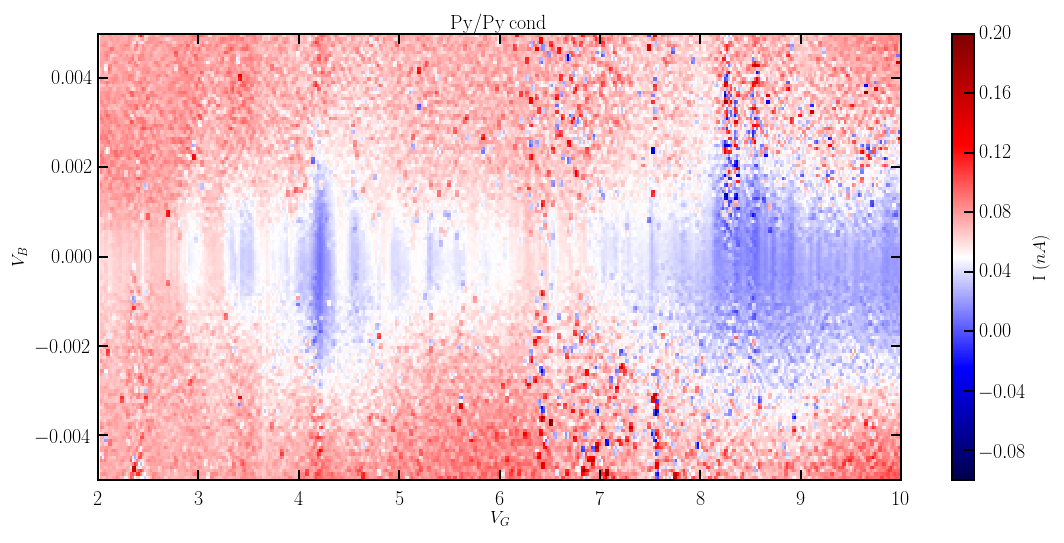

In [46]:
ddf = (df.diff()/75e-6)/7.75e-5

ddf = pd.rolling_mean(ddf, 2, axis = 1)
ddf = pd.rolling_mean(ddf, 2, axis = 0)

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(ddf)
im = ax.imshow(ddf, extent = limits, 
           cmap = plt.cm.seismic, vmin = -0.1, vmax = 0.2, 
           origin = 'lower', aspect = 'auto', interpolation = 'Nearest')
ax.set_title('Py/Py cond')
ax.set_xlabel('$V_G$')
ax.set_ylabel('$V_B$')
ax.set_ylim(-0.005, 0.005)

cb = plt.colorbar(im)
cb.set_label('I $(nA)$')

That looks terrible. Something is wrong with this.

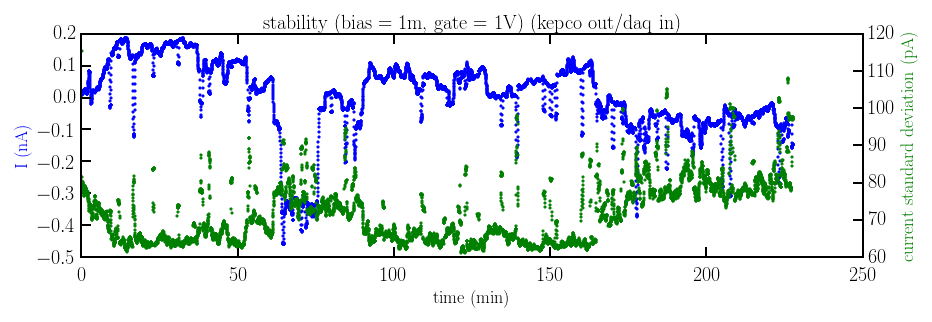

In [47]:
f = data_dir + 'stability_20-17-6_4K_0T_b.bin'

stability = pd.rolling_mean(lvdt.get_data_2d(f), 20)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, (stability['Iavg']-stability['Iavg'].mean())*1e9, 'b.', ms = 5)
ax.set_xlim(0,60)
#ax.set_ylim(0,0.9)
ax.set_title('stability (bias = 1m, gate = 1V) (kepco out/daq in)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

ax2 = ax.twinx()
ax2.plot(stability['time']/60.0, stability['Istd']*1e12, 'g.', ms = 5)
ax2.set_ylabel('current standard deviation (pA)')

ax.yaxis.label.set_color('b')
ax2.yaxis.label.set_color('g')

What a mess. I don't know where all of this noise came from. I'm not sure this counts as stable at all.

Shutting down the magnet supply and pumping on the can to take one more try at it.

In [48]:
f = data_dir+'gateswp_20-17-6_4K-0T_b.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

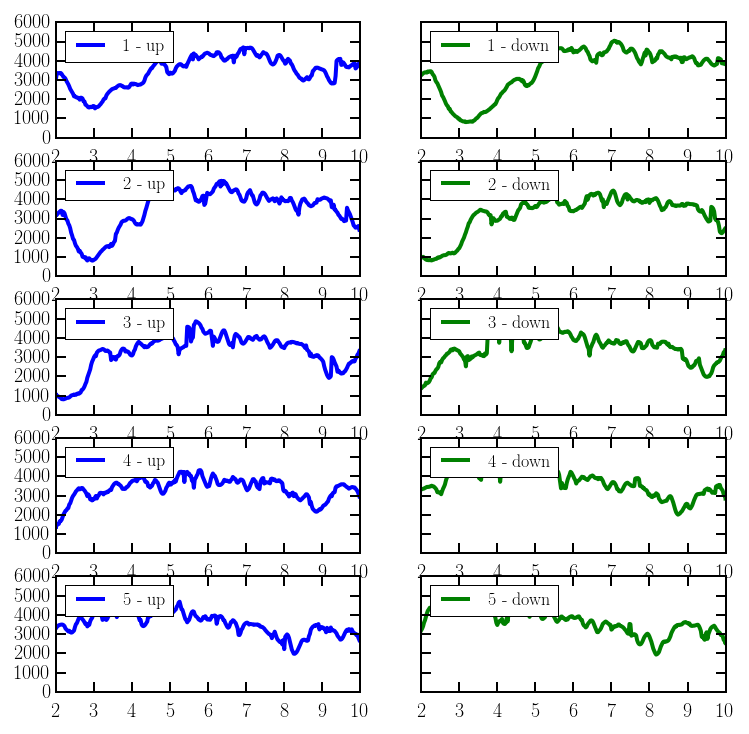

In [49]:
fig, axs = plt.subplots(5,2,sharex = False, sharey=True, 
                        figsize=(12,12))

axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')

bias = 0.5e-3
for i in range(len(ind)-1):
    if i%2 == 0:
        lc = 'b'
        l = '{0:d} - up'.format(i/2 + 1)
    elif i%2 ==1:
        lc = 'g'
        l = '{0:d} - down'.format((i-1)/2 + 1)
        
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Iavg'][ind[i]:ind[i+1]]*1e9/bias,
            c = lc, label=l)
    
    axs[i].legend(loc = 'upper left')

That definitely shows the exact same drift as the other devices.

One more check of the stability with the gate grounded.

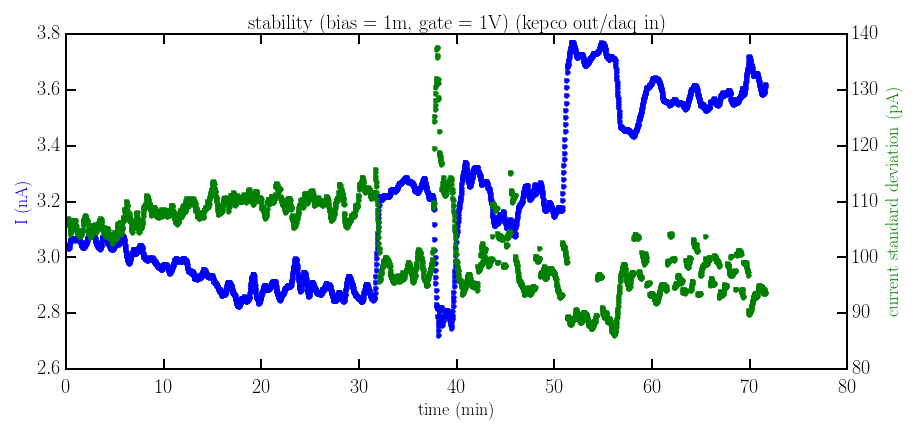

In [50]:
f = data_dir+'stability_20-17-6_4K_0T_c.bin'

stability = pd.rolling_mean(lvdt.get_data_2d(f), 20)

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, (stability['Iavg'])*1e9, 'b.', ms = 10)
ax.set_xlim(0,60)
#ax.set_ylim(0,0.9)
ax.set_title('stability (bias = 1m, gate = 1V) (kepco out/daq in)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

ax2 = ax.twinx()
ax2.plot(stability['time']/60.0, stability['Istd']*1e12, 'g.', ms = 10)
ax2.set_ylabel('current standard deviation (pA)')

ax.yaxis.label.set_color('b')
ax2.yaxis.label.set_color('g')

I'm done with this mess.

# 15/16 Niobium/Niobium

This one does show some drifting problem. I have a suspicion this has something to do with the titanium sticking layer under the niobium leads. Or just some junk under that one Niobium lead.

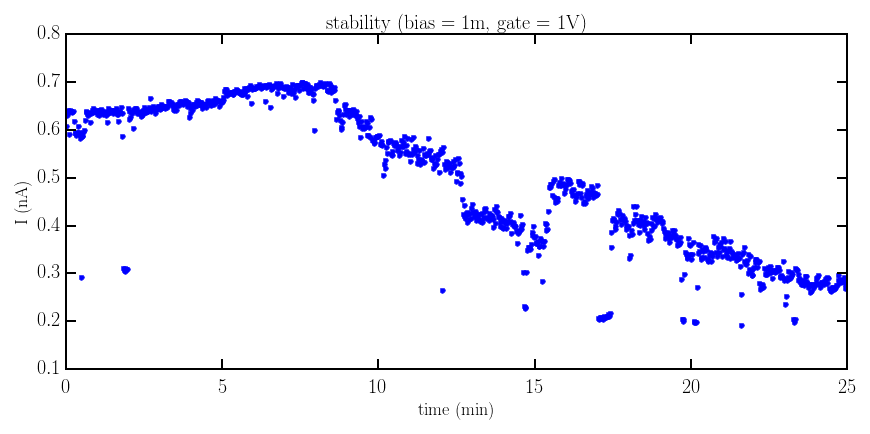

In [51]:
f = data_dir+'stability_15-26-6_4K_0T_a.bin'

stability = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,1,1)
ax.plot(stability['time']/60.0, stability['Iavg']*1e9, 'b.', ms = 10)
ax.set_xlim(0,25)
#ax.set_ylim(4,6)
ax.set_title('stability (bias = 1m, gate = 1V)')
ax.set_xlabel('time (min)')
ax.set_ylabel('I (nA)')

Bummer.